## Proyecto 1 - Bicicletas compartidas (Modelamiento)
#### Juan David Rios 
#### Viviana Lara 202122798  
#### Catalina Gómez 202122560

In [18]:
import pandas as pd
data = pd.read_csv("../data/SeoulBikeData_limpio.csv")

### Modelo de regresión lineal (1)

$y = \beta_0 + \beta_1 \times \text{Hour} + \beta_2 \times \text{Temperature} + \beta_3 \times \text{Humidity} + \beta_4 \times \text{Wind speed} + \beta_5\times \text{Visibility} + \beta_6\times \text{Solar Radiation} + \beta_7\times \text{Seasons}$

In [19]:
from sklearn.model_selection import train_test_split
# Define las variables independientes y la variable dependiente
features = ['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Seasons']
X = data[features]
y = data['Rented Bike Count']

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
import statsmodels.api as sm
# agregar constante explíticamente
X_train = sm.add_constant(X_train)
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
linreg1 = sm.OLS(y_train, X_train).fit()
# resumen de resultados
print(linreg1.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1068.
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:18:06   Log-Likelihood:                -50845.
No. Observations:                6772   AIC:                         1.017e+05
Df Residuals:                    6764   BIC:                         1.018e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [21]:
y_pred = linreg1.predict(sm.add_constant(X_test))

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
import numpy as np
# Evaluar el modelo con R^2 y RMSE, MAE, MSE
r2 = r2_score(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
print(f"R²: {r2}")
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

R²: 0.5308057341594268
MAE: 332.7634500290637
MSE: 198807.73246249108
RMSE: 445.87860731648817


### Modelo de regresión lineal (2)

$y = \beta_0 + \beta_1 \times \text{Hour} + \beta_2 \times \text{Temperature} + \beta_3 \times \text{Humidity} + \beta_4\times \text{Visibility} + \beta_5\times \text{Solar Radiation} + \beta_6\times \text{Seasons}$

In [23]:
from sklearn.model_selection import train_test_split
# Define las variables independientes y la variable dependiente
features2 = ['Hour', 'Temperature(C)', 'Humidity(%)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Seasons']
X = data[features2]
y = data['Rented Bike Count']

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
import statsmodels.api as sm
# agregar constante explíticamente
X_train = sm.add_constant(X_train)
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
linreg2 = sm.OLS(y_train, X_train).fit()
# resumen de resultados
print(linreg2.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     1246.
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:18:06   Log-Likelihood:                -50847.
No. Observations:                6772   AIC:                         1.017e+05
Df Residuals:                    6765   BIC:                         1.018e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [25]:
y_pred = linreg2.predict(sm.add_constant(X_test))

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
import numpy as np
# Evaluar el modelo 2 con R^2 y RMSE, MAE, MSE
r2 = r2_score(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
print(f"R²: {r2}")
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

R²: 0.530260557360033
MAE: 332.75440949091234
MSE: 199038.7356336071
RMSE: 446.1375747833925


### Modelo Forecasting ARIMA

In [27]:
data1 = pd.read_csv("../data/SeoulBikeData_limpio.csv", parse_dates=["Date"])
data1 = data1.sort_values(by=["Date","Hour"], ascending=True)
data1.set_index('Date', inplace=True)
data1.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons
Date,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,0.0,3
2017-12-01,204,1,-5.5,38,0.8,2000,0.0,3
2017-12-01,173,2,-6.0,39,1.0,2000,0.0,3
2017-12-01,107,3,-6.2,40,0.9,2000,0.0,3
2017-12-01,78,4,-6.0,36,2.3,2000,0.0,3


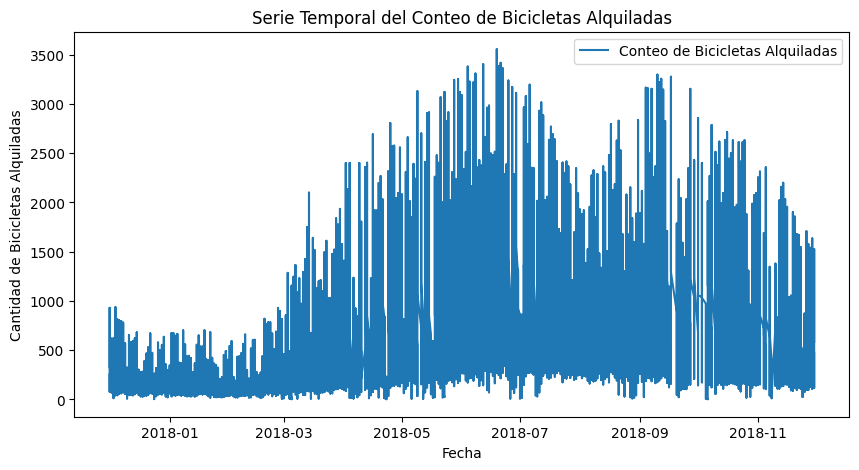

In [28]:
import matplotlib.pyplot as plt

var_resp = data1["Rented Bike Count"]
# Visualizar la serie temporal
plt.figure(figsize=(10, 5))
plt.plot(var_resp.index, var_resp, label='Conteo de Bicicletas Alquiladas')
plt.title('Serie Temporal del Conteo de Bicicletas Alquiladas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Bicicletas Alquiladas')
plt.legend()
plt.show()

In [29]:
from statsmodels.tsa.stattools import adfuller
#Verificar estacionaridad con Prueba de Dickey-Fuller Aumentada (ADF)
result = adfuller(var_resp)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Si p-value > 0.05, no es estacionaria. Realizamos diferenciación.
if result[1] > 0.05:
    data_diff = var_resp.diff().dropna()  # Diferenciación de la serie
else:
    data_diff = var_resp

ADF Statistic: -6.194370592444441
p-value: 6.015088969161097e-08


In [30]:
from pmdarima import auto_arima
model_arima = auto_arima(var_resp, 
                   seasonal= True,
                   d=0,
                   trace=True,     
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)   
# Resumen del modelo seleccionado
print(model_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=49.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=133480.367, Time=0.33 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=119296.346, Time=0.75 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=125638.582, Time=6.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=140487.214, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=118571.677, Time=2.41 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=118516.521, Time=2.83 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=118451.060, Time=3.23 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=118388.795, Time=4.80 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=118389.969, Time=17.08 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=118443.558, Time=13.88 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=118831.197, Time=1.89 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0] intercept
Total fit time: 103.678 seconds
                               SARIMAX Results                    

In [31]:
from statsmodels.tsa.arima.model import ARIMA

mejor_param = model_arima.order
# Ajustar el modelo ARIMA
model = ARIMA(data1['Rented Bike Count'], order=mejor_param)
model_fit = model.fit()
model_fit.summary()

C:\Users\vivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Rented Bike Count   No. Observations:                 8465
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -59187.397
Date:                Tue, 10 Sep 2024   AIC                         118388.794
Time:                        01:19:59   BIC                         118438.100
Sample:                             0   HQIC                        118405.623
                               - 8465                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        729.1570     35.012     20.826      0.000     660.534     797.780
ar.L1          1.1832      0.010    122.572      0.000       1.164       1.202
ar.L2         -0.3997      0.022    -18.457      0.000      -0.442      -0.357
ar.L3          0.1513      0.029      5.299      0.000       0.095       0.207
ar.L4          0.0145      0.028      0.512      0.609      -0.041       0.070
ar.L5         -0.0870      0.019     -4.666      0.000      -0.123      -0.050
sigma2      6.931e+04    671.869    103.164      0.000     6.8e+04    7.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              9632.89
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               4.73   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Realizar predicciones 
data1['Predicted'] = model_fit.fittedvalues

# Evaluar el modelo con R^2 y RMSE, MAE, MSE
R2_a = r2_score(data1['Rented Bike Count'], data1['Predicted'])
RMSE_a = np.sqrt(mean_squared_error(data1['Rented Bike Count'], data1['Predicted']))
MAE_a = mean_absolute_error(data1['Rented Bike Count'], data1['Predicted'])
MSE_a = mean_squared_error(data1['Rented Bike Count'], data1['Predicted'])
print(f"R²: {R2_a}")
print(f"MAE: {MAE_a}")
print(f"MSE: {MSE_a}")
print(f"RMSE: {RMSE_a}")

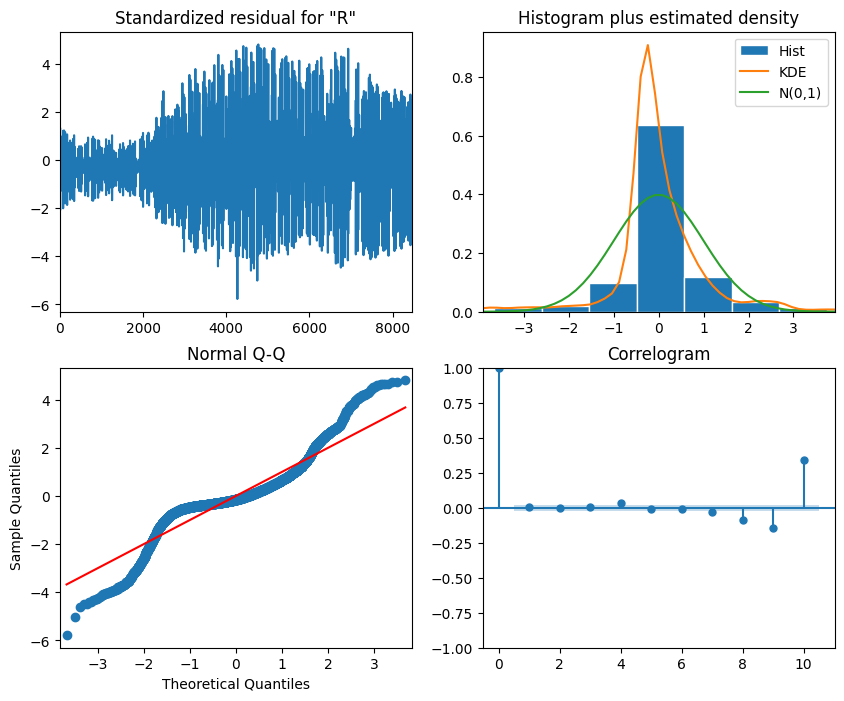

In [33]:
# Diagnóstico del modelo
model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

C:\Users\vivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


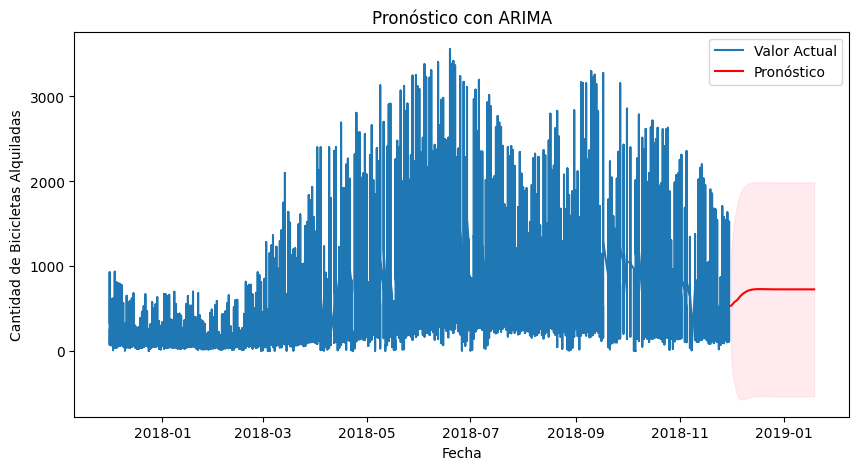

In [34]:
# Pronosticar los próximos 50 períodos
forecast = model_fit.get_forecast(steps=50)
forecast_index = pd.date_range(start=data1.index[-1], periods=51, freq='D')[1:]  

# Obtener predicciones y errores estándar
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Visualizar el pronóstico
plt.figure(figsize=(10, 5))
plt.plot(data1.index, data1['Rented Bike Count'], label='Valor Actual')
plt.plot(forecast_index, forecast_mean, label='Pronóstico', color='red')
plt.fill_between(forecast_index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Bicicletas Alquiladas')
plt.title('Pronóstico con ARIMA')
plt.legend()
plt.show()